In [43]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
from scipy import fftpack
from scipy.ndimage import gaussian_filter
from scipy import signal
import scipy
import warnings
warnings.filterwarnings('ignore')

In [80]:
dfi_O1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O1/Run1.txt', delimiter=' ' , dtype= np.float64)
dfi_O2 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O2/Run1.txt', delimiter=' ' , dtype= np.float64)
dfi_O1 = dfi_O1.rename(columns={"Time-delay1": "O1"}, errors="raise")
dfi_O2 = pd.concat([dfi_O2['Delays'], dfi_O2['Time-delay1']], axis=1)
dfi = dfi_O2.rename(columns={"Time-delay1": "O2"}, errors="raise")
dfi = pd.concat([dfi['Delays'], dfi_O1['O1'], dfi['O2']], axis=1)

In [81]:
dfit1_O1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it1/O1/Run1.txt', delimiter=' ' , dtype= np.float64)
dfit1_O2_run1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it1/O2/Run1.txt', delimiter=' ' , 
                           dtype= np.float64)
dfit1_O2_run2 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it1/O2/Run2.txt', delimiter=' ' , 
                           dtype= np.float64)
dfit1_O1 = dfit1_O1.rename(columns={"Time-delay1": "O1"}, errors="raise")
dfit1_O1 = pd.concat([dfit1_O1['Delays'], dfit1_O1['O1']], axis=1)
dfit1_O2_run1 = dfit1_O2_run1.rename(columns={"Time-delay1": "O2 (Run 1)"}, errors="raise")
dfit1_O2_run2 = dfit1_O2_run2.rename(columns={"Time-delay1": "O2 (Run 2)"}, errors="raise")
dfit1_O2 = pd.concat([dfit1_O2_run2['Delays'], dfit1_O2_run1['O2 (Run 1)'], dfit1_O2_run2['O2 (Run 2)']], axis=1)

In [84]:
dfit2_O1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it2/O1/Run1.txt', delimiter=' ' , dtype= np.float64)
dfit2_O1 = dfit2_O1.rename(columns={"Time-delay1": "O1"}, errors="raise")
dfit2_O1 = pd.concat([dfit2_O1['Delays'], dfit2_O1['O1']], axis=1)

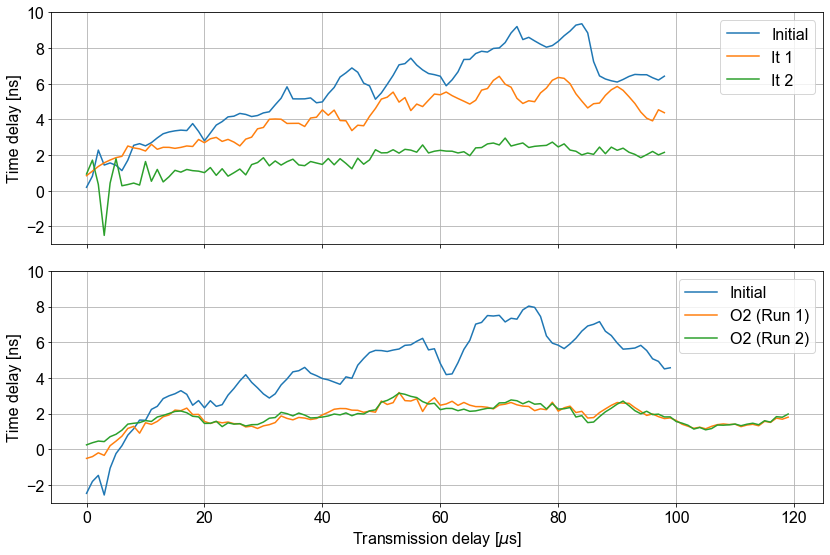

In [94]:
fig, ax = plt.subplots(2, 1, figsize =(12, 8), sharex = True)
ax[0].plot(dfi['Delays'], dfi['O1'], label='Initial')
ax[0].plot(dfit1_O1['Delays'], dfit1_O1['O1'], label='It 1')
ax[0].plot(dfit2_O1['Delays'], dfit2_O1['O1'], label='It 2')
ax[1].plot(dfi['Delays'], dfi['O2'], label='Initial')
[ax[1].plot(dfit1_O2['Delays'], dfit1_O2[i], label=i) for i in dfit1_O2.keys()[1:]]
ax[1].legend()
[ax[i].set_ylabel('Time delay [ns]') for i in range(2)]
[ax[i].set_ylim(-3.0, 10.0) for i in range(2)]
[ax[i].grid() for i in range(2)]
[ax[i].legend() for i in range(2)]
ax[1].set_xlabel('Transmission delay [$\mu$s]')
plt.tight_layout()
plt.show()

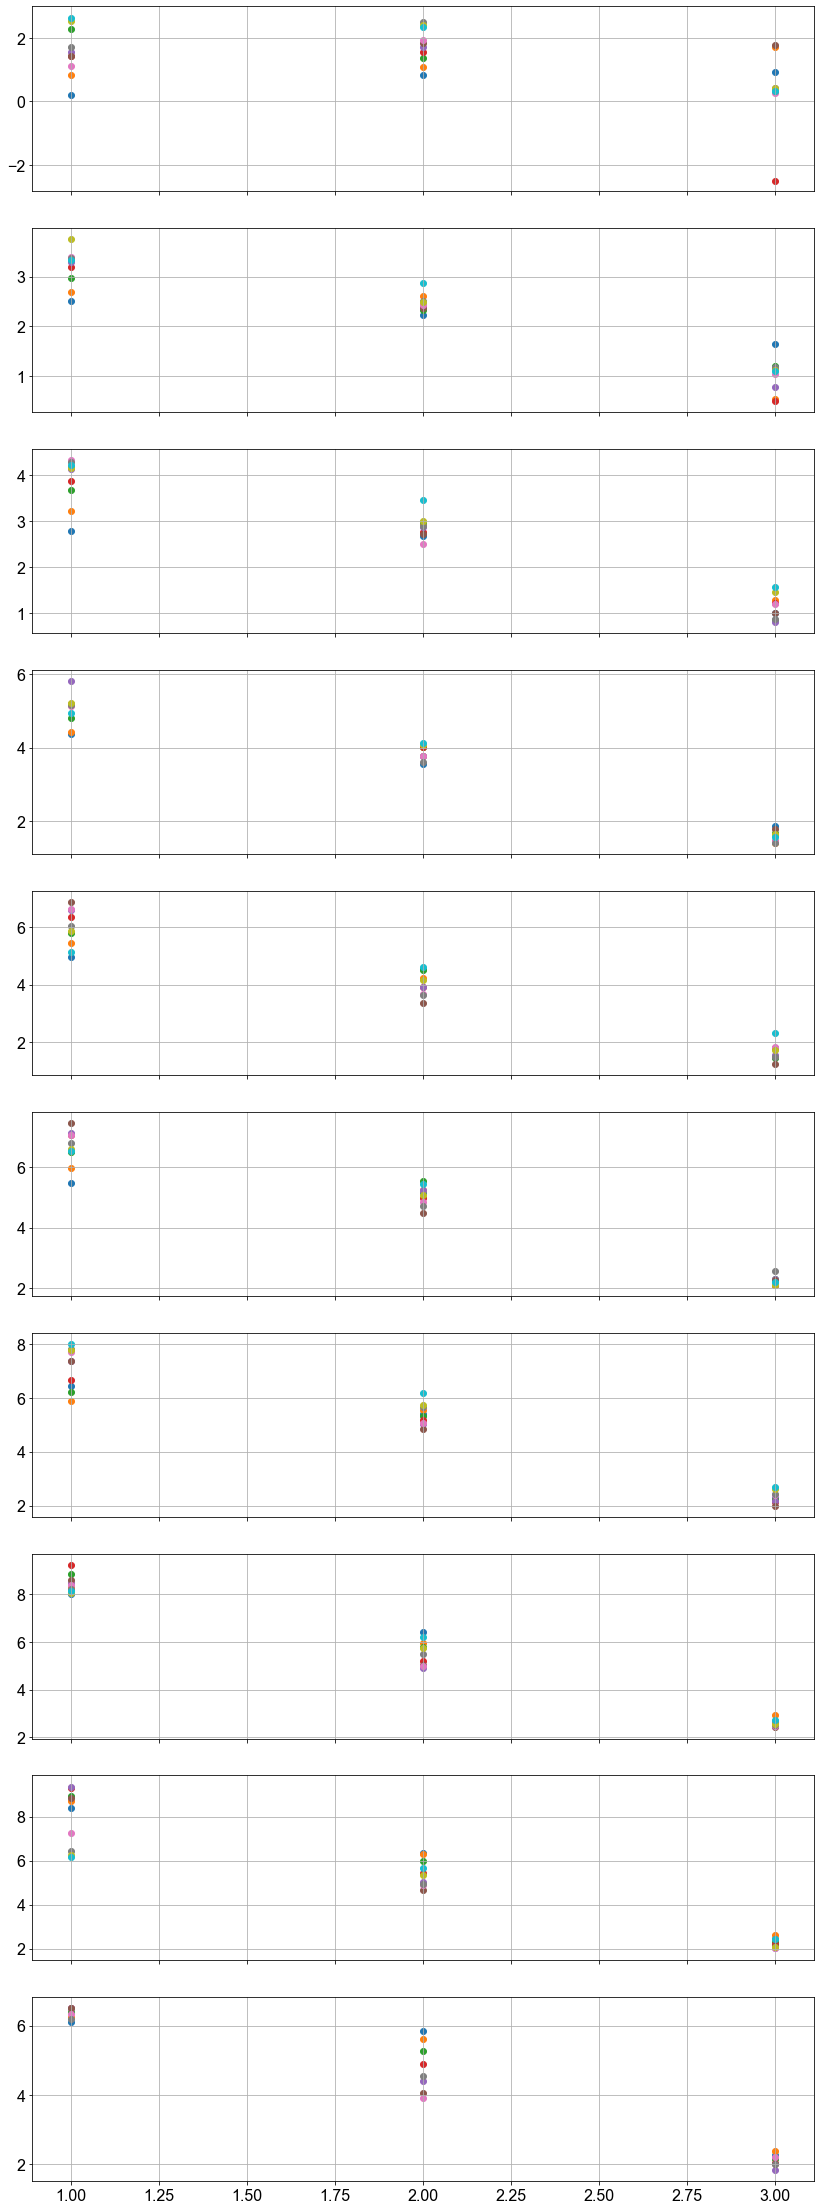

In [127]:
fig, ax =  plt.subplots(10, 1, figsize=(14, 40), sharex = True)
x = np.arange(0,3,1)
[ax[0].scatter(x+1, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][:10]]
[ax[1].scatter(x+1, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][10:20]]
[ax[2].scatter(x+1, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][20:30]]
[ax[3].scatter(x+1, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][30:40]]
[ax[4].scatter(x+1, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][40:50]]
[ax[5].scatter(x+1, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][50:60]]
[ax[6].scatter(x+1, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][60:70]]
[ax[7].scatter(x+1, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][70:80]]
[ax[8].scatter(x+1, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][80:90]]
[ax[9].scatter(x+1, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][90:98]]
[ax[i].grid() for i in range(10)]
plt.show()